In [13]:
import os
import ssl
import numpy
import random
import pandas
from matplotlib import pyplot

In [2]:
import torch
from Plot import plot_metrics
from Dataset import ImageDataset, dataset
from Model import CNN, train_and_validate, predict

In [3]:
def set_seed(seed):
    """Sets the seed for reproducibility."""
    random.seed(seed)
    numpy.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [4]:
def load_data(path):
    """Loads the data from the given path."""
    folders = [name for name in os.listdir(path) if not name.startswith('.')]
    
    numbers = 0
    for n in range(len(folders)):
        patient_id = folders[n]
        for c in [0, 1]:
            patient_path = path + patient_id 
            class_path = patient_path + "/" + str(c) + "/"
            files = os.listdir(class_path)
            numbers += len(files)
            
    data = pandas.DataFrame(index=numpy.arange(0, numbers), columns=['patient_id', 'path', 'target'])
    
    index = 0
    for n in range(len(folders)):
        patient_id = folders[n]
        patient_path = path + patient_id 
        for c in [0, 1]:
            class_path = patient_path + '/' + str(c) + '/'
            files = os.listdir(class_path)
            for m in range(len(files)):
                image_path = files[m]
                data.loc[index, 'target'] = int(c)
                data.loc[index, 'patient_id'] = patient_id
                data.loc[index, 'path'] = class_path + image_path
                index += 1
    return data

In [5]:
set_seed(0)
%matplotlib inline
ssl_create_default_https_context = ssl._create_unverified_context

In [6]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cpu


In [7]:
PATH = os.getcwd()
DATA_PATH = os.path.join(PATH, 'DATA/')
PLOT_PATH = os.path.join(PATH, 'PLOT/')
DATA = load_data(DATA_PATH)

In [8]:
WORKER_SIZE = 4
EPOCH_SIZE = 30
BATCH_SIZE = 1024
WEIGHT_DECAY = 0.0001
LEARNING_RATE = 0.0005

In [9]:
WEIGHT, TRAIN_LOADER, VALIDATION_LOADER, TEST_LOADER = dataset(DATA, DEVICE, BATCH_SIZE, WORKER_SIZE)
print(f"Train size: {len(TRAIN_LOADER.dataset)}, Validation size: {len(VALIDATION_LOADER.dataset)}, Test size: {len(TEST_LOADER.dataset)}")

Train size: 222019, Validation size: 27752, Test size: 27753


In [10]:
LOSS_FUNCTION = torch.nn.CrossEntropyLoss(weight=WEIGHT)
MODEL = CNN().to(DEVICE)
print(MODEL)

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.25, inplace=False)
    (12): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): Dropout(p=0.25, inplace=False)
  )
  (fc_layer): Sequential(
    (0): Linear

In [11]:
OPTIMIZER = torch.optim.Adam(MODEL.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
TRAIN_METRICS, VALIDATION_METRICS = train_and_validate(MODEL, TRAIN_LOADER, VALIDATION_LOADER, LOSS_FUNCTION, OPTIMIZER, EPOCH_SIZE, DEVICE)

Epoch [1 / 30], time: 8.56 minutes
Train metrics - losses: 0.4316, scores: 0.7693, recalls: 0.8124, precisions: 0.7611, accuracies: 0.7900
Validation metrics - losses: 0.3708, scores: 0.8050, recalls: 0.8418, precisions: 0.7929, accuracies: 0.8246
Epoch [2 / 30], time: 8.65 minutes
Train metrics - losses: 0.3767, scores: 0.8097, recalls: 0.8419, precisions: 0.7963, accuracies: 0.8319
Validation metrics - losses: 0.3587, scores: 0.8200, recalls: 0.8512, precisions: 0.8065, accuracies: 0.8403
Epoch [3 / 30], time: 8.72 minutes
Train metrics - losses: 0.3632, scores: 0.8203, recalls: 0.8491, precisions: 0.8065, accuracies: 0.8427
Validation metrics - losses: 0.3399, scores: 0.8378, recalls: 0.8568, precisions: 0.8257, accuracies: 0.8603
Epoch [4 / 30], time: 8.72 minutes
Train metrics - losses: 0.3552, scores: 0.8238, recalls: 0.8522, precisions: 0.8097, accuracies: 0.8459
Validation metrics - losses: 0.3424, scores: 0.8289, recalls: 0.8579, precisions: 0.8150, accuracies: 0.8491
Epoch [5

env: PATH=/global/homes/y/yhzhang/opt/texlive/bin/x86_64-linux:/pscratch/sd/y/yhzhang/MLConda


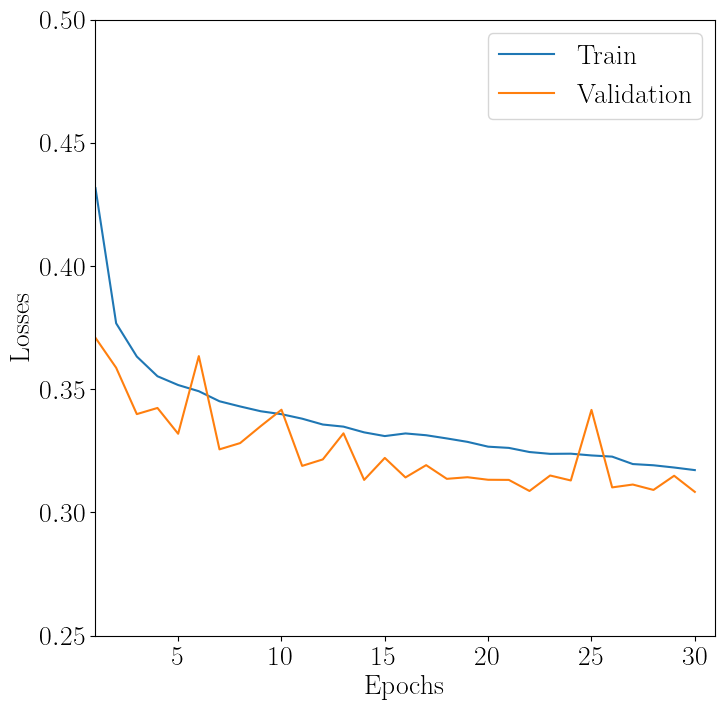

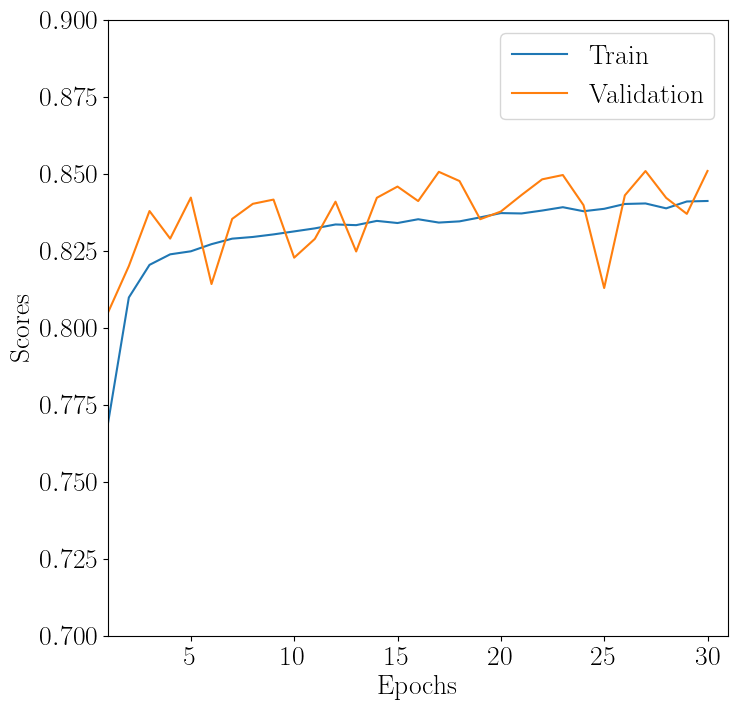

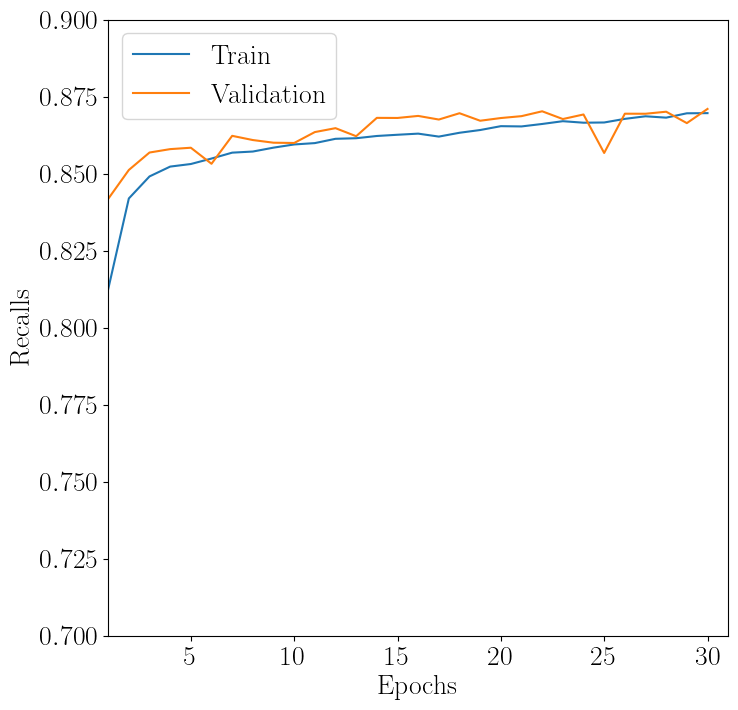

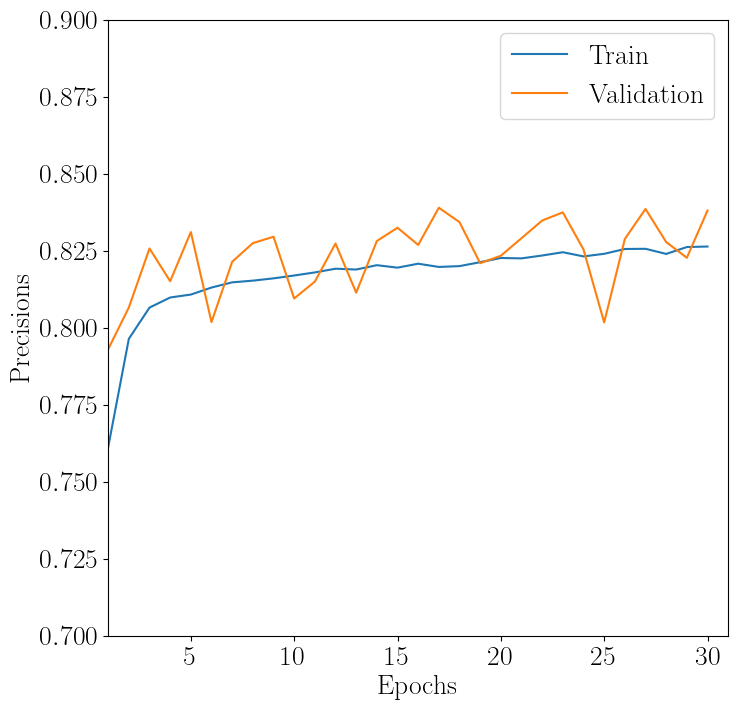

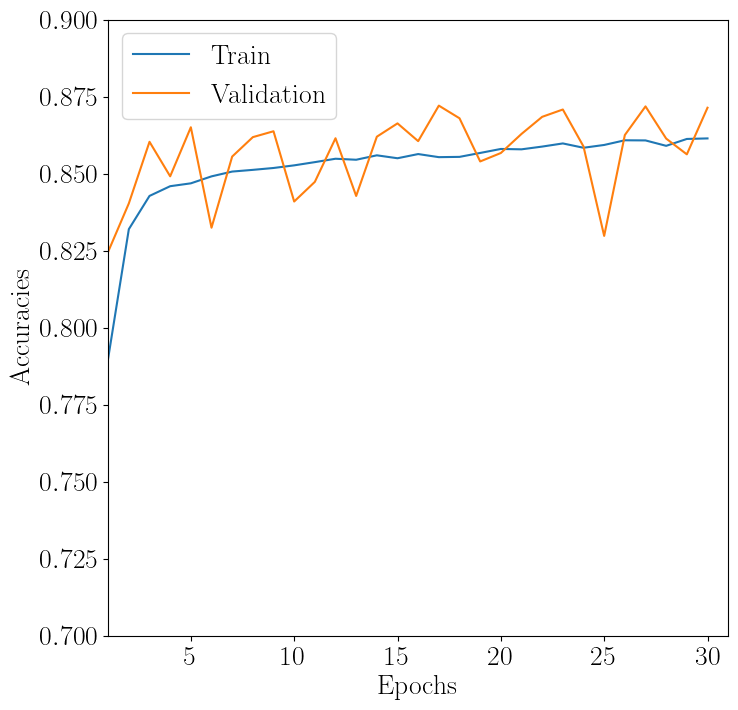

In [24]:
%env PATH=/global/homes/y/yhzhang/opt/texlive/bin/x86_64-linux:$PATH
pyplot.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
pyplot.rcParams['pgf.texsystem'] = 'pdflatex'
pyplot.rcParams['text.usetex'] = True
pyplot.rcParams['font.size'] = 20
   
plot_metrics(PLOT_PATH, EPOCH_SIZE, TRAIN_METRICS, VALIDATION_METRICS)

In [15]:
torch.save(MODEL, os.path.join(PATH, 'MODEL.pth'))

In [21]:
TEST_METRICS = predict(MODEL, TEST_LOADER, DEVICE, LOSS_FUNCTION)
print(TEST_METRICS)

{'loss': 0.3101597728589391, 'score': 0.8448024397016773, 'recall': 0.867760946675314, 'accuracy': 0.8664288545382481, 'precision': 0.8309788034135092}
